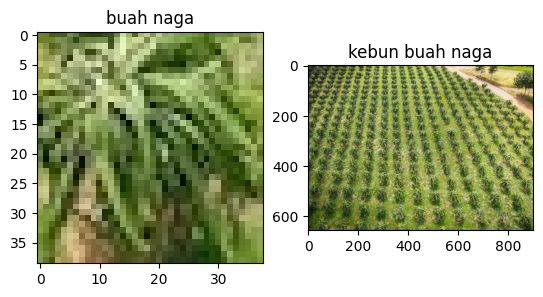

In [45]:
# tampilkan kedua gambar
from matplotlib import pyplot as plt
import cv2

# panggil dan konversi warna agar sesuai dengan Matplotlib
palem = cv2.imread('images/buahnaga.jpg')
palem = cv2.cvtColor(palem, cv2.COLOR_BGR2RGB)

# panggil dan konversi warna agar sesuai dengan Matplotlib
kebun_palem = cv2.imread('images/buahnaga-kebun.jpg')
kebun_palem = cv2.cvtColor(kebun_palem, cv2.COLOR_BGR2RGB) 
plt.subplot(121),plt.imshow(palem), plt.title('buah naga')
plt.subplot(122),plt.imshow(kebun_palem), plt.title('kebun buah naga')
plt.show()

Jumlah objek ditemukan  1098


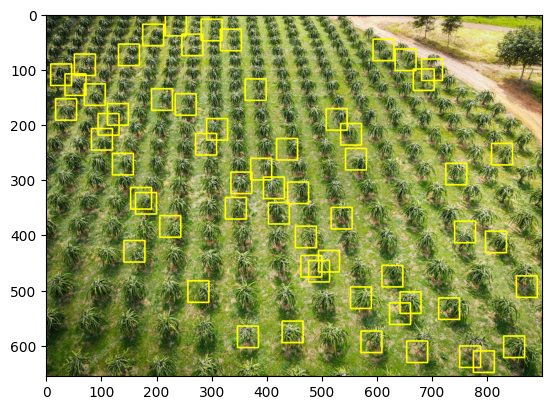

In [43]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow

## membaca gambar utuh untuk dicari
img_rgb = cv2.imread('images/buahnaga-kebun.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

## membaca template 
template = cv2.imread('images/buahnaga.jpg',0)

## ukuran template. ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik. 
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.195
loc = np.where(res >= threshold)

## membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint=[]
lspoint2=[]

count = 0 # untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    ## jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        ## gambar persegi warna kuning dengan ketebalan tiga poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
        for i in range(((pt[0])-9), ((pt[0])+9),1):
            ## tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range(((pt[1])-9), ((pt[1])+9),1):
            ## tambahkan koordinat y ke list
            lspoint2.append(k)
            count+=1 ### berapa jumlah matching yang ditemukan?
    else:
        continue
    
print ("Jumlah objek ditemukan ", count)

# tampilkan dengan imshow 
# cv2.imshow("citra output", img_rgb)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.show()